In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

In [2]:
df = pd.read_csv('data/locations.csv')

In [3]:
df

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
1,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.8,8.0,28.0,20.0
2,London,United Kingdom,Europe,51.52,-0.11,-2.9,31.6,12.0,8.0,28.0,20.0
3,Oslo,Norway,Europe,59.92,10.75,-18.1,27.6,4.3,8.0,28.0,20.0
4,Helsinki,Finland,Europe,60.18,24.93,-12.8,26.2,6.7,8.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
60,Melbourne,Australia,Australia,-37.82,144.97,1.4,39.6,15.1,15.0,28.0,20.0
61,Brisbane,Australia,Australia,-27.50,153.02,9.1,34.6,20.8,15.0,28.0,20.0
62,Broome,Australia,Australia,-17.97,122.23,13.3,34.9,27.0,15.0,28.0,20.0
63,Wellington,New Zealand,Pacific,-41.30,174.78,5.0,22.4,13.7,20.0,30.0,25.0


In [4]:
X = df[['latitude', 'longitude']]
y = df.drop(['city', 'country', 'continent', 'latitude', 'longitude'], axis=1)

In [5]:
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
df2 = pd.read_csv('data/locations_copy.csv')
X2 = df2[['latitude', 'longitude']]
y2 = df2.drop(['city', 'country', 'continent', 'latitude', 'longitude'], axis=1)
model2 = XGBRegressor()
model2.fit(X2, y2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
predictions = model.predict(np.array([[77, -46]]))

In [87]:
predictions

array([[-17.009861 ,  11.70438  ,  -7.7183185,  -5.0017943,  15.038769 ,
          5.000332 ]], dtype=float32)

C:\Users\tymek\AppData\Local\Temp\ipykernel_17676\2231483453.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



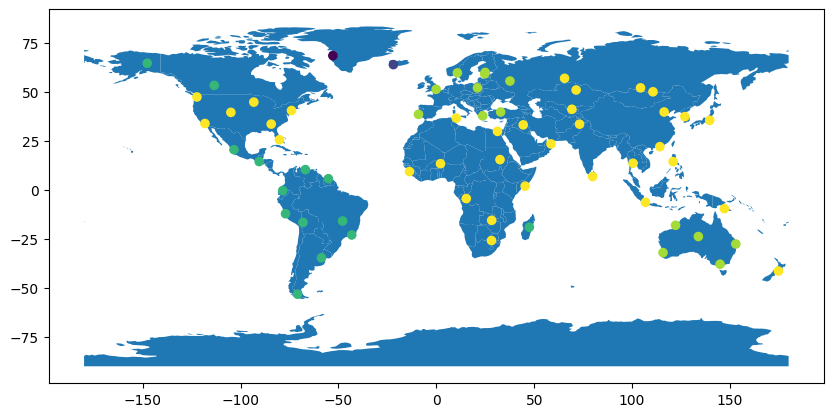

In [105]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv('../data/locations_copy.csv')
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', c=gdf['maxtemp'], markersize=35);

In [6]:
from data.data import plot_map

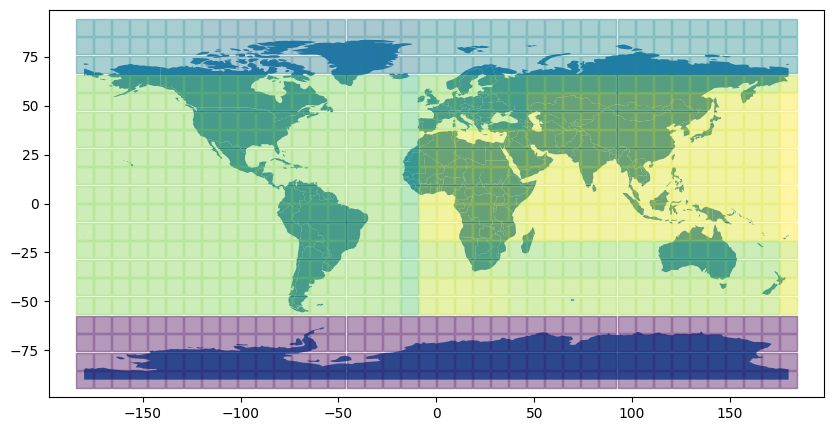

In [7]:
plot_map(400, 5, model, 150)

C:\Users\tymek\PycharmProjects\alwaysgoodweather\data\data.py:117: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


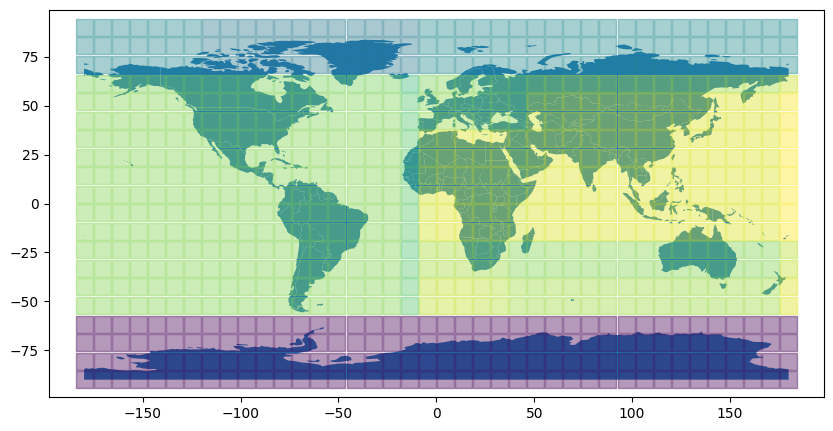

In [40]:
from data.data import plot_map
plot_map(400, 5, model2, 150)

In [1]:
from joblib import dump, load
dump(model2, 'temp_model.joblib')
# clf = load('temp_model.joblib')

NameError: name 'model2' is not defined

### Transformer function

In [2]:
clf = load('temp_model.joblib')

In [11]:
predictions = clf.predict(np.array([[50, 20]]))[0]
predictions

array([-5.6936226, 35.095333 , 11.00511  ,  8.377334 , 28.37596  ,
       21.03823  ], dtype=float32)

In [25]:
temp = 45

In [26]:
if temp < predictions[2]:
    slope, intercept = np.polyfit([predictions[0], predictions[2]], [predictions[3], predictions[5]], deg=1)
else:
    slope, intercept = np.polyfit([predictions[1], predictions[2]], [predictions[4], predictions[5]], deg=1)
slope * temp + intercept

31.39285781448858

### API

In [1]:
from weather_api import WeatherApi

In [14]:
response, code = WeatherApi.get_response_forecast('bangkok', 1)

In [15]:
response['forecast']['forecastday'][0]['hour'][12]

{'time_epoch': 1704171600,
 'time': '2024-01-02 12:00',
 'temp_c': 33.7,
 'temp_f': 92.7,
 'is_day': 1,
 'condition': {'text': 'Sunny',
  'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png',
  'code': 1000},
 'wind_mph': 3.8,
 'wind_kph': 6.1,
 'wind_degree': 29,
 'wind_dir': 'NNE',
 'pressure_mb': 1011.0,
 'pressure_in': 29.85,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'humidity': 36,
 'cloud': 4,
 'feelslike_c': 34.8,
 'feelslike_f': 94.7,
 'windchill_c': 33.7,
 'windchill_f': 92.7,
 'heatindex_c': 34.8,
 'heatindex_f': 94.7,
 'dewpoint_c': 16.7,
 'dewpoint_f': 62.1,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 4.4,
 'gust_kph': 7.1,
 'uv': 8.0}

In [20]:
response['location']['localtime']

'2024-01-02 2:45'

In [ ]:
date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')

hour = date_object.hour